# Розв’язання диференційних рівнянь 2 порядку

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Створюємо функцію для явного метода Ейлера для рівняння 2 порядку
def ExplEuler(h,t0,tn,x0,f):
  # h - крок чисельного розв'язання
  # t0 - початковий час, не обов'язково дорівнює 0
  # tn - кінцевий час
  # x0=[x(t0),x'(t0)] - вектор заданих початкових умов
  # f - функція, що задана дифрівнянням
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.array([np.zeros(n + 1) for i in range(2)])# заготовка для масивів координати та швидкості# 0 й елемент - координата, 1 й елемент - перша похідна, швидкість
    x[: , 0] = x0# вносимо початкові умови
    for i in range(n): #і буде мати значення від 0 до n - 1
        x2 = f(t[i], x[: , i])# обчислюємо поточне прискорення
        x[1, i + 1] = x[1, i] + x2 * h# формула явного методу Ейлера для швидкості
        x[0, i + 1] = x[0, i] + x[1, i] * h# формула явного методу Ейлера для координати
    return (t, x, 'Explicit Euler Method')

def SemiImplEuler(h,t0,tn,x0,f):
  # h - крок чисельного розв'язання
  # t0 - початковий час, не обов'язково дорівнює 0
  # tn - кінцевий час
  # x0=[x(t0),x'(t0)] - вектор заданих початкових умов
  # f - функція, що задана дифрівнянням
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.array([np.zeros(n + 1) for i in range(2)])# заготовка для масивів координати та швидкості# 0 й елемент - координата, 1 й елемент - перша похідна, швидкість
    x[: , 0] = x0# вносимо початкові умови
    for i in range(n): #і буде мати значення від 0 до n - 1
        x2 = f(t[i], x[: , i])# обчислюємо поточне прискорення
        x[1, i + 1] = x[1, i] + x2 * h# формула явного методу Ейлера для швидкості
        x[0, i + 1] = x[0, i] + x[1, i + 1] * h# формула НЕявного методу Ейлера для координати
    return (t, x, 'Semi-implicit Euler Method')

def ImplEuler(h,t0,tn,x0,f):
  # h - крок чисельного розв'язання
  # t0 - початковий час, не обов'язково дорівнює 0
  # tn - кінцевий час
  # x0=[x(t0),x'(t0)] - вектор заданих початкових умов
  # f - функція для неявного методу
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.array([np.zeros(n + 1) for i in range(2)])# заготовка для масивів координати та швидкості# 0 й елемент - координата, 1 й елемент - перша похідна, швидкість
    x[: , 0] = x0# вносимо початкові умови
    for i in range(n): #і буде мати значення від 0 до n - 1
        x2 = f(t[i + 1], x[: , i])# обчислюємо поточне прискорення
        x[1, i + 1] = x[1, i] + x2 * h# формула явного методу Ейлера для швидкості
        x[0, i + 1] = x[0, i] + x[1, i + 1] * h# формула НЕявного методу Ейлера для координати
    return (t, x, 'Implicit Euler Method')

def MiddlePoint(h,t0,tn,x0,f):
  # h - крок чисельного розв'язання
  # t0 - початковий час, не обов'язково дорівнює 0
  # tn - кінцевий час
  # x0=[x(t0),x'(t0)] - вектор заданих початкових умов
  # f - функція, що задана дифрівнянням
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.array([np.zeros(n + 1) for i in range(2)])# заготовка для масивів координати та швидкості# 0 й елемент - координата, 1 й елемент - перша похідна, швидкість
    x[: , 0] = x0# вносимо початкові умови
    for i in range(n): #і буде мати значення від 0 до n - 1
        x2 = f(t[i], x[: , i])# обчислюємо поточне прискорення
        x[1, i + 1] = x[1, i] + x2 * h# формула явного методу Ейлера для швидкості
        x[0, i + 1] = x[0, i] + (x[1, i] + x[1, i + 1]) * h / 2# координата визначається на основі середньої арифметичної швидкості
    return (t, x, 'Middle Point Method')

def Verlet(h,t0,tn,x0,f):
  # h - крок чисельного розв'язання
  # t0 - початковий час, не обов'язково дорівнює 0
  # tn - кінцевий час
  # x0=[x(t0),x'(t0)] - вектор заданих початкових умов
  # f - функція, що задана дифрівнянням
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.array([np.zeros(n + 1) for i in range(2)])# заготовка для масивів координати та швидкості# 0 й елемент - координата, 1 й елемент - перша похідна, швидкість
    x[: , 0] = x0# вносимо початкові умови
    x2 = f(t[0], x[: , 0])# обчислюємо нульове прискорення
    x[1, 1] = x[1, 0] + x2 * h# формула явного методу Ейлера для швидкості 1
    x[0, 1] = x[0, 0] + (x[1, 0] + x[1, 1]) * h / 2# координата визначається на основі середньої арифметичної швидкості
    for i in range(1, n): #і буде мати значення від 1 до n - 1
        x2=f(t[i],x[:,i])
        x[0,i+1]=2*x[0,i]-x[0,i-1]+x2*(h**2)
        x[1,i]=(x[0,i+1]-x[0,i-1])* h / 2
    x2 = f(t[n - 1], x[: , n - 1])# обчислюємо нульове прискорення
    x[1, n] = x[1, n - 1] + x2 * h
    return (t, x, 'Verlet Method')

def VeloVerlet(h,t0,tn,x0,f):
  # h - крок чисельного розв'язання
  # t0 - початковий час, не обов'язково дорівнює 0
  # tn - кінцевий час
  # x0=[x(t0),x'(t0)] - вектор заданих початкових умов
  # f - функція, що задана дифрівнянням
    n = math.ceil((tn - t0) / h)# кількість кроків, округлена вгору
    t = [t0 + i * h for i in range(n + 1)]
    t = np.array(t)# створюємо масив часу
    x = np.array([np.zeros(n + 1) for i in range(2)])# заготовка для масивів координати та швидкості# 0 й елемент - координата, 1 й елемент - перша похідна, швидкість
    x[: , 0] = x0# вносимо початкові умови
    x2 = f(t[0], x[: , 0])
    for i in range(n): #і буде мати значення від 0 до n - 1
        x[0, i + 1] = x[0, i] + x[1, i] * h + x2 * h ** 2 / 2
        x22 = f(t[i + 1], x[: , i + 1])
        x[1, i + 1] = x[1, i] + (x2 + x22) * h / 2
        x2 = x22
    return (t, x, 'Velocity Verlet Method')

# Створюємо функцію для аналізу стійкості метода
def StabilityAnalysis(Method,H,t0,tn,x0,f,solution):
  # Method - назва функції, що задає метод
  # f - функція, що задана дифрівнянням
  # H - масив кроків, з якими будемо розв'язувати рівняння та досліджувати стійкість H=(0.01, 0.1, 0.5)
  # solution - функція, що описує аналітичний розв'язок рівняння
    fig, stiykplot = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 8))
    for h in H:
        (T, X, name) = Method(h, t0, tn, x0, f)# в змінні(t, x, name) запише масив часу, масив координати та ім 'я методу
        stiykplot[0].plot(T, X[0], label = 'h=' + str(h))
        stiykplot[1].plot(T, X[1], label = 'h=' + str(h))# print(h)# print(x)
    T = np.arange(t0, tn + 0.01, 0.01)
    X = solution(T)# xmin = np.min(X[0]) * 0.8# xmax = np.max(X[0]) * 1.2
    stiykplot[0].plot(T, X[0], ':', label = 'Solution')
    stiykplot[1].plot(T, X[1], ':', label = 'Solution')
    for i in range(2):
        stiykplot[i].grid(True)
        stiykplot[i].legend()
        stiykplot[i].set_xlim(t0, tn)
        stiykplot[i].set_xlabel('t')# plt.ylim(xmin, xmax)
    stiykplot[0].set_ylabel('Coordinate x')
    stiykplot[1].set_ylabel('Velocity v')
    stiykplot[0].set_title(name + ' for coordinate\ndifferent steps')
    stiykplot[1].set_title(name + ' for velocity\ndifferent steps')

# Створюємо функцію для дослідження похибки від кроку
def Error(Method,H,t0,tn,x0,f,solution):
    n=len(x0) #визначимо кількість рядків
    Er=[[] for i in range(n)]
    for h in H:
        (t,x,name)=Method(h,t0,tn,x0,f) #x - чисельний розв'язок
        sol=solution(t)
        for i in range(n):
            er=math.sqrt(np.sum((sol[i]-x[i])**2)/len(sol[i]))
            Er[i]=Er[i]+[er]
    fig, erplot=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    for i in range(n):
        erplot[i].plot(H,Er[i])
        erplot[i].grid(True)
        erplot[i].set_ylim(0,max(Er[i]))
        erplot[i].set_xlabel('Step h')
        erplot[i].set_ylabel('Error')
    erplot[0].set_title('Error dependence for coordinate\non step for '+name)
    erplot[1].set_title('Error dependence for velocity\non step for '+name)

# Створюємо функцію для дослідження похибки від кроку
def Errorh2(Method,H,t0,tn,x0,f,solution):
    n=len(x0) #визначимо кількість рядків
    Er=[[] for i in range(n)]
    for h in H:
        (t,x,name)=Method(h,t0,tn,x0,f) #x - чисельний розв'язок
        sol=Method(h/2,t0,tn,x0,f)[1] #x - чисельний розв'язок з кроком вдвічі менше
        for k in range(n):
            a=[sol[k,i] for i in range(len(sol[0])) if i%2==0]
            b=x[k]
            if len(b)!=len(a):
                L=min(len(b),len(a))
                b=b[:L]
                a=a[:L]
            er=math.sqrt(np.sum((b-a)**2)/len(a))
            Er[k]=Er[k]+[er]
    fig, erplot=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    for i in range(n):
        erplot[i].plot(H,Er[i])
        erplot[i].grid(True)
        erplot[i].set_ylim(0,max(Er[i]))
        erplot[i].set_xlabel('Step h')
        erplot[i].set_ylabel('Error')
    erplot[0].set_title('Error dependence for coordinate\non step for '+name)
    erplot[1].set_title('Error dependence for velocity\non step for '+name)

# Створюємо функцію для дослідження взаємозв'язку похибок різними методиками
def Errors(Method,H,t0,tn,x0,f,solution):
    n=len(x0) #визначимо кількість рядків
    ER=[[] for i in range(n)]
    ERh2=[[] for i in range(n)]
    for h in H:
        (t,x,name)=Method(h,t0,tn,x0,f) #x - чисельний розв'язок
        sol=solution(t)
        for i in range(n):
            er=math.sqrt(np.sum((sol[i]-x[i])**2)/len(sol[i]))
            ER[i]=ER[i]+[er]
        sol=Method(h/2,t0,tn,x0,f)[1] #x - чисельний розв'язок з кроком вдвічі менше
        for k in range(n):
            a=[sol[k,i] for i in range(len(sol[0])) if i%2==0]
            b=x[k]
            if len(b)!=len(a):
                L=min(len(b),len(a))
                b=b[:L]
                a=a[:L]
            er=math.sqrt(np.sum((b-a)**2)/len(a))
            ERh2[k]=ERh2[k]+[er]
    fig, erplot=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    for i in range(n):
        Er=ER[i]
        Erh2=ERh2[i]
        kof=round(sum([Er[i]/Erh2[i] for i in range(len(Er))])/len(Er),3)
        erplot[i].plot(Erh2,Er,label='Error dependence')
        erplot[i].plot(Erh2,Erh2,label='y=x')
        erplot[i].grid(True)
        erplot[i].legend()
        erplot[i].set_ylim(0,max(Er))
        erplot[i].set_xlabel('Halved step error')
        erplot[i].set_ylabel('Error')
        erplot[i].set_title('Error dependence on halved step error\n'+name+'\nEr/Erh2='+str(kof))
        
def MethodAnalysis(Methods,title,h,t0,tn,x0,f,solution = None):
    for Method in Methods:
        (T,(X,V),name) = Method(h, t0, tn, x0, f)
        plt.plot(T,X,label=name)
    if(solution != None):
        T = np.arange(t0, tn + 0.01, 0.01)
        X = solution(T)
        plt.plot(T, X[0], ':', label = 'Solution')
    plt.title(title)
    plt.legend()
    plt.show()

## Умова задачі
Варіант 12
Розв’язати задане згідно з варіантом у таблиці 1 рівняння аналітично та чисельно явним методом Ейлера, напівнеявним методом Ейлера, методом серединної точки, методами Верле. Графіки розв’язків усіма методами представити на одній системі координат. Початкову величину кроків оберіть самостійно. Оцінити точність методів порівняно до аналітичного розв’язку (де можливо) та за допомогою методу подвійного прорахунку, зробити висновки. Поступово збільшуючи кількість кроків вдвічі, отримайте похибку у 1000 разів менше від початкової. Проаналізувати стійкість та точність кожного методу для кожного рівняння та оцініть зв’язок між похибками, обчисленими різними способами.
<br>
1)
$$ \frac{d^2y}{dt^2} + 4\frac{dy}{dt} = -7 - 5 cos(7t) $$
2)
$$ \frac{d^2y}{dt^2} - 2y = 4sin(2t+y) $$
3)
$$ \frac{d^2y}{dt^2} - 2\frac{dy}{dt} = 4sin(2t+y) $$
$$ t_0 = 0, y(t_0) = 7, \frac{dy}{dt}(t_0)=10, t \in [0;6] $$
## Аналітичний розв'язок
1)
$$ y(t) = -\frac{7}{4}t-\frac{627}{208}e^{-4t}-\frac{4}{91}sin(7t)+\frac{1}{13}cos(7t)+\frac{159}{16}$$
Друге і третє рівняння не мають аналітичних розв'язків.

In [2]:
# Дані задачі: 
(t0, tn, x0) = (0, 6, (7, 10))

#Дифрівняння
def equation1(t,y): # y[1]=dy/dt, y[0] = y
    return -7-5*np.cos(7*t)-4*y[1]
# Аналітичний розв'язок
def solution1(t):
    dy = -(7/4)-(627/208)*(-4)*np.exp(-4*t)-(4/91)*7*np.cos(7*t)-(1/13)*7*np.sin(7*t) # похідна від розв'язку
    y = -(7/4)*t-(627/208)*np.exp(-4*t)-(4/91)*np.sin(7*t)+(1/13)*np.cos(7*t)+159/16 # аналітичний розв'язок
    return np.array([y, dy])

#Дифрівняння
def equation2(t,y): # y[1]=dy/dt, y[0] = y
    return 4*np.sin(2*t + y[0])+2*y[0]
# Аналітичний розв'язок
def solution2(t):
    dy = y = np.zeros(len(t)) # немає аналітичного розв'язку
    return np.array([y, dy])
#Дифрівняння
def equation3(t,y): # y[1]=dy/dt, y[0] = y
    return 4*np.sin(2*t + y[0])+2*y[1]
# Аналітичний розв'язок
def solution3(t):
    dy = y = np.zeros(len(t)) # немає аналітичного розв'язку
    return np.array([y, dy])

#Кроки для стійкості
H1=(0.005, 0.01, 0.05, 0.1, 0.25)

#Кроки для похибки
H2=np.arange(0.002,0.1+0.002,0.002)
#Дуже маленькі кроки для похибки
H2_2=np.arange(0.0002, 0.002, 0.00002)

# Аналіз стійкості та точності методів

## Задача 1

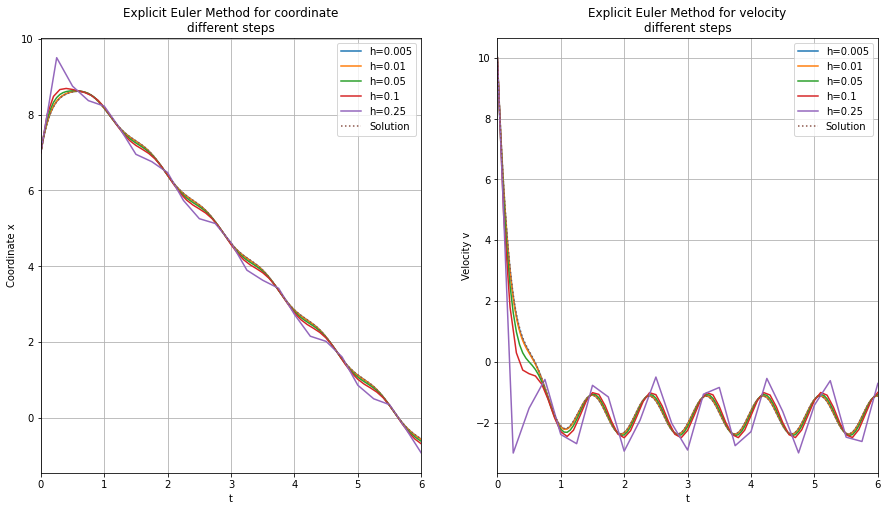

In [3]:
# Явний метод Ейлера
StabilityAnalysis(ExplEuler,H1,t0,tn,x0,equation1,solution1)

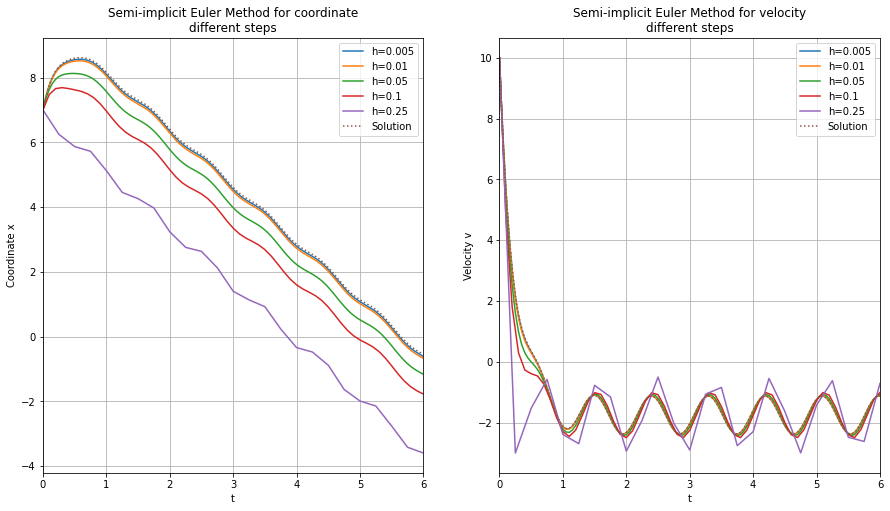

In [4]:
# Напівнеявний метод Ейлера
StabilityAnalysis(SemiImplEuler,H1,t0,tn,x0,equation1,solution1)

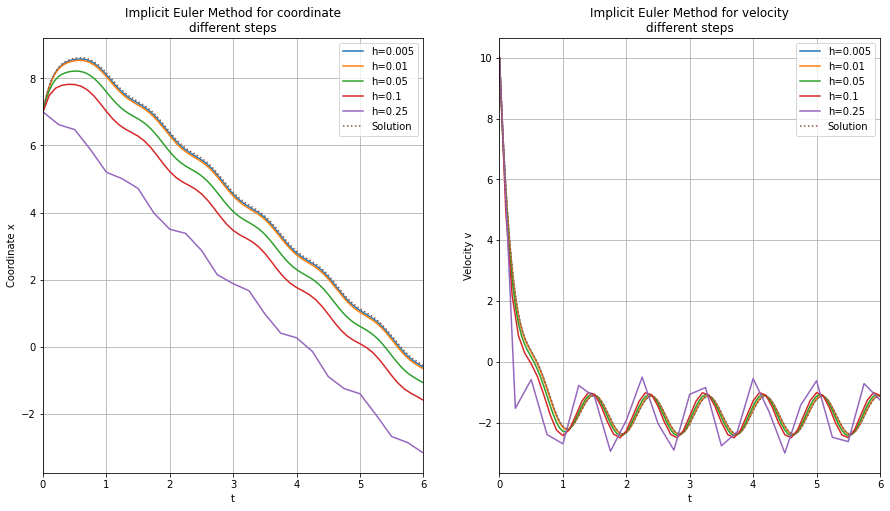

In [5]:
# Неявний метод Ейлера
StabilityAnalysis(ImplEuler,H1,t0,tn,x0,equation1,solution1)

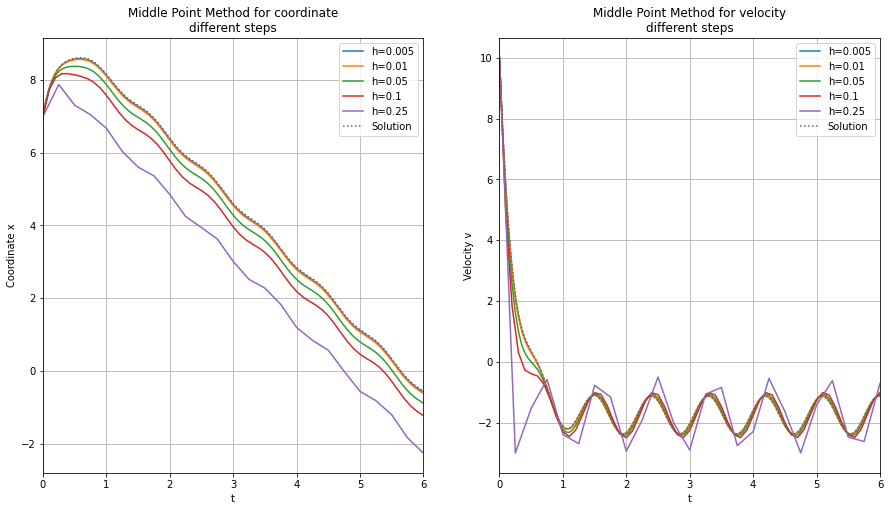

In [6]:
# Метод серединної точки
StabilityAnalysis(MiddlePoint,H1,t0,tn,x0,equation1,solution1)

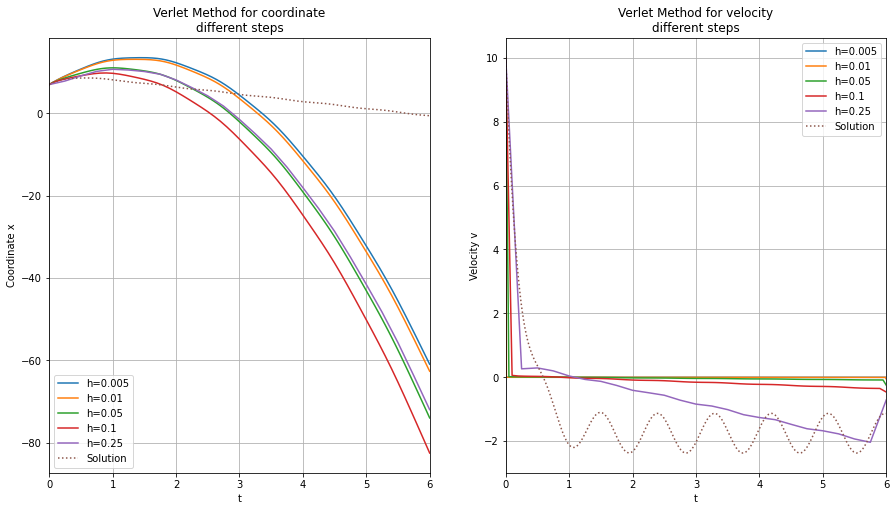

In [7]:
# Метод Верле
StabilityAnalysis(Verlet,H1,t0,tn,x0,equation1,solution1)

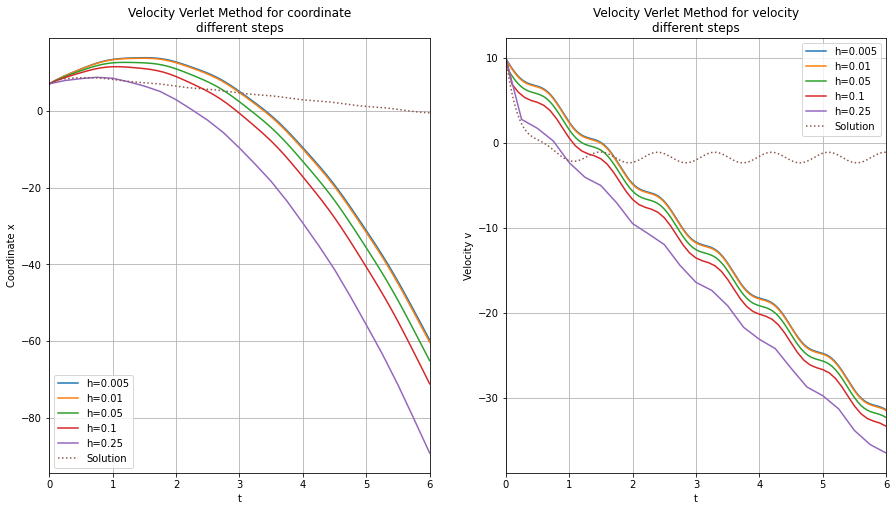

In [8]:
# Швидкісний метод Верле
StabilityAnalysis(VeloVerlet,H1,t0,tn,x0,equation1,solution1)

Можемо помітити, що при розв'язанні задачі 1 найбільш стійким виявився явний метод Ейлера, трохи гірші результати дає метод серединної точки, е гірші - напівнеявний та неявний методи Ейлера. Методи Верле та швидкісного Верле некоретно застосовувати до даної задачі, адже у нас є залежність прискорення від швидкості, тому отриманий розв'язок розходиться із існуючим. (Аналогічну поведінку можемо помітити і для задачі 3, тоді як в задачі 2 такої залежності немає, тому розв'язок коректний)

## Задача 2

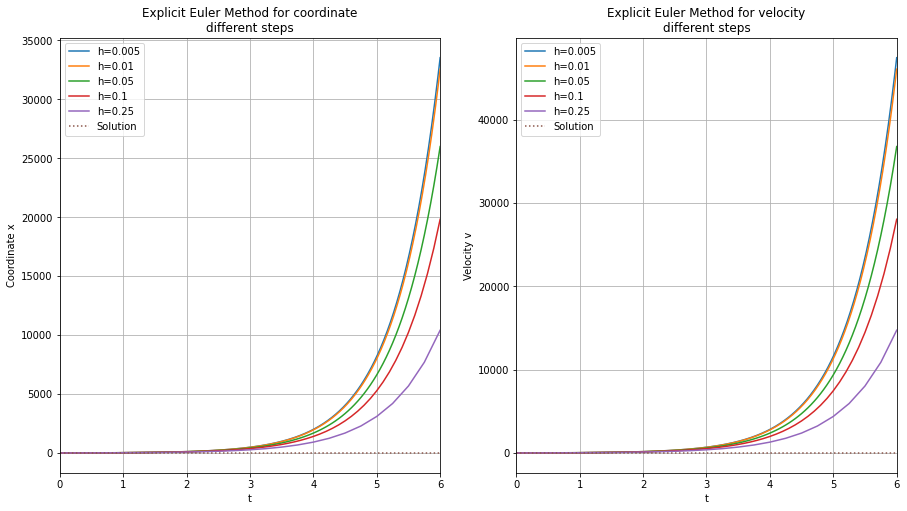

In [9]:
# Явний метод Ейлера
StabilityAnalysis(ExplEuler,H1,t0,tn,x0,equation2,solution2)

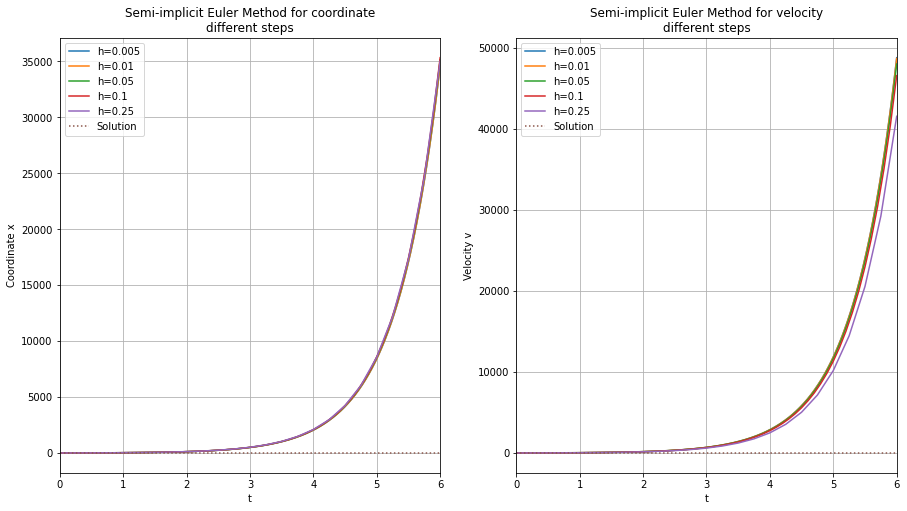

In [10]:
# Напівнеявний метод Ейлера
StabilityAnalysis(SemiImplEuler,H1,t0,tn,x0,equation2,solution2)

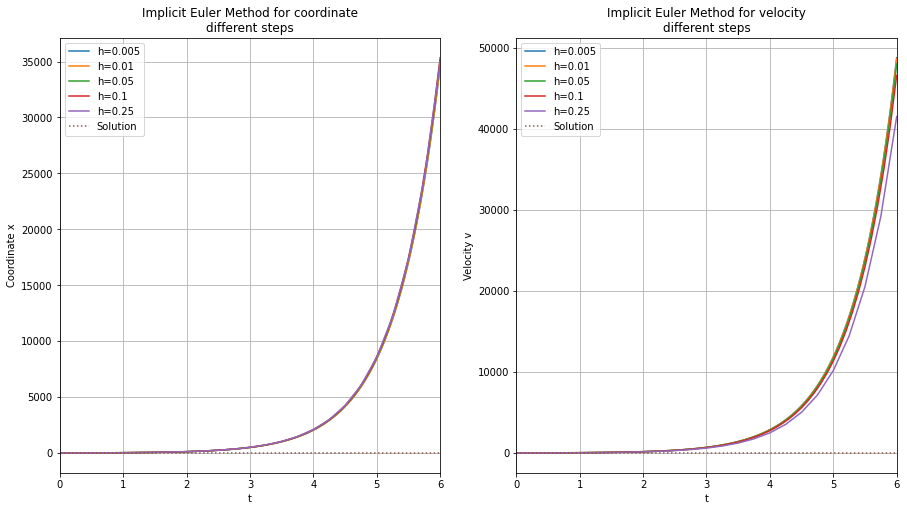

In [11]:
# Неявний метод Ейлера
StabilityAnalysis(ImplEuler,H1,t0,tn,x0,equation2,solution2)

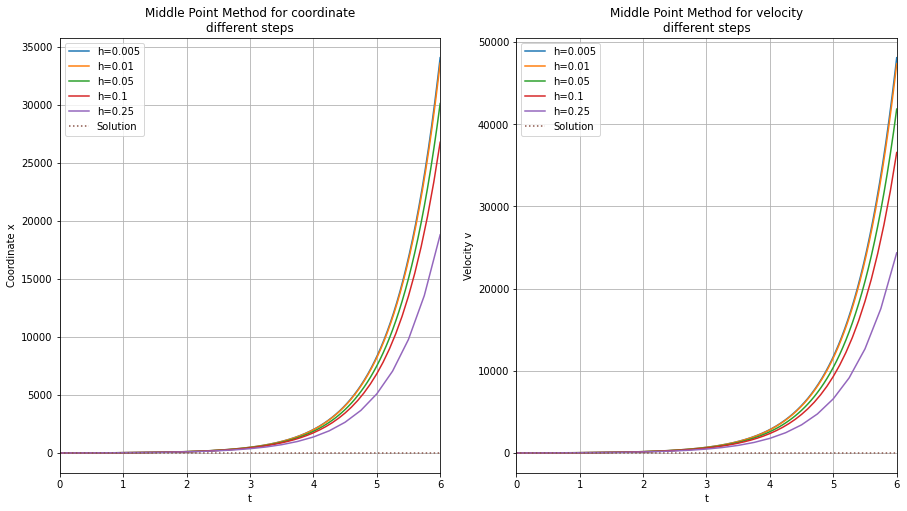

In [12]:
# Метод серединної точки
StabilityAnalysis(MiddlePoint,H1,t0,tn,x0,equation2,solution2)

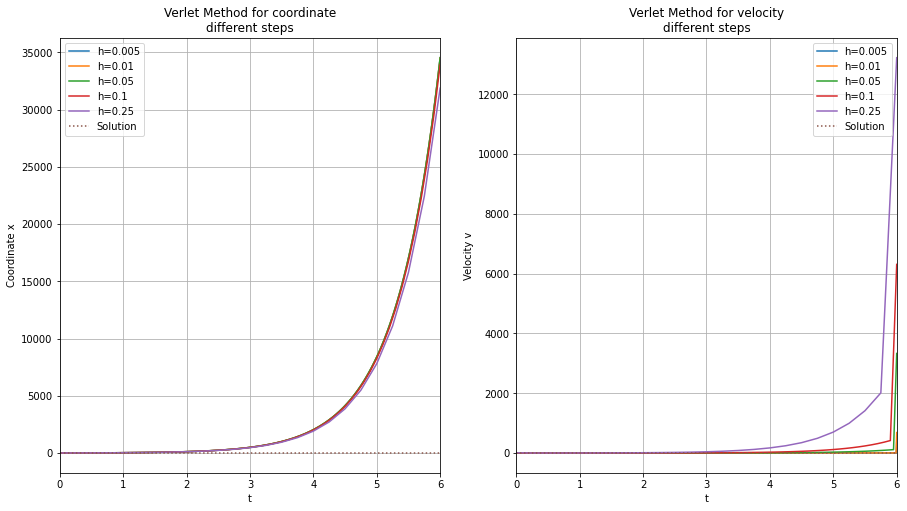

In [13]:
# Метод Верле
StabilityAnalysis(Verlet,H1,t0,tn,x0,equation2,solution2)

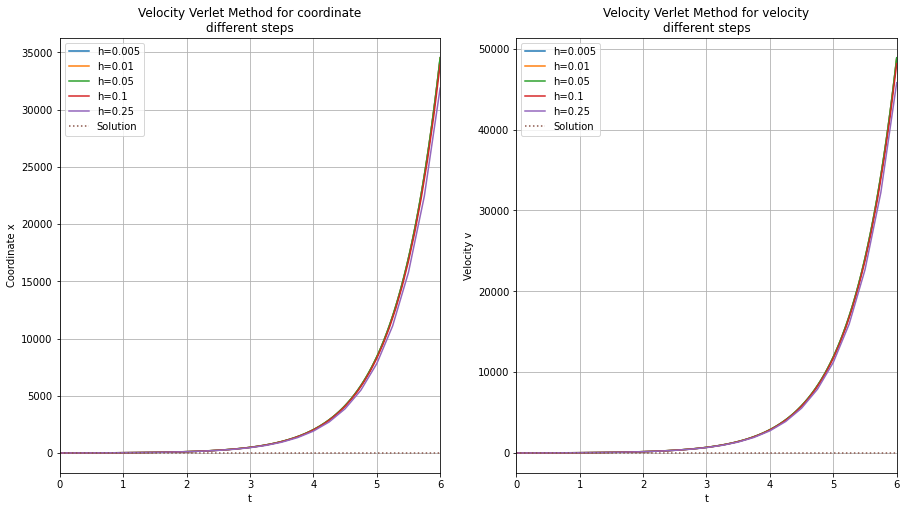

In [14]:
# Швидкісний метод Верле
StabilityAnalysis(VeloVerlet,H1,t0,tn,x0,equation2,solution2)

Для задачі 2 отримано, що явний метод Ейлера найменш стійкий, всі інші методи близькі по стійкості. Також зауважимо ще раз, що методи Верле та швидкісного Верле тут працюють, адже у рівнянні немає залежності прискорення від швидкості.

## Задача 3

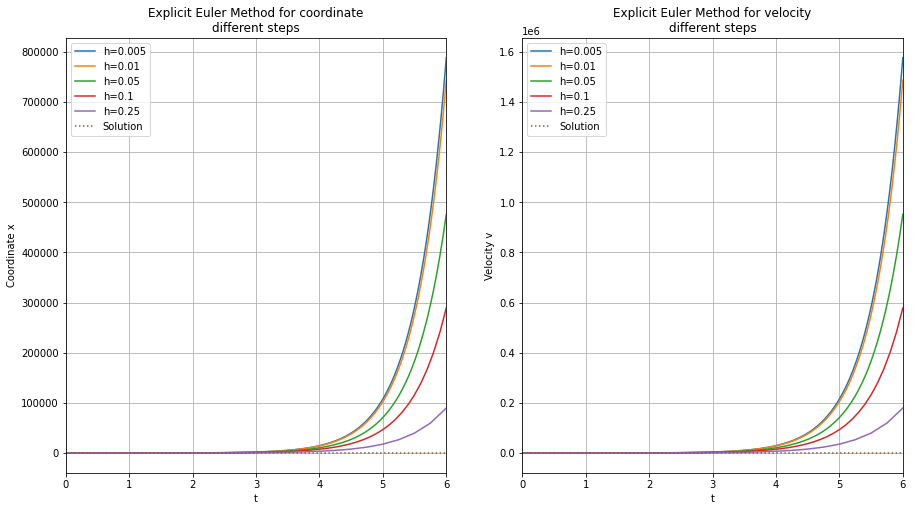

In [15]:
# Явний метод Ейлера
StabilityAnalysis(ExplEuler,H1,t0,tn,x0,equation3,solution3)

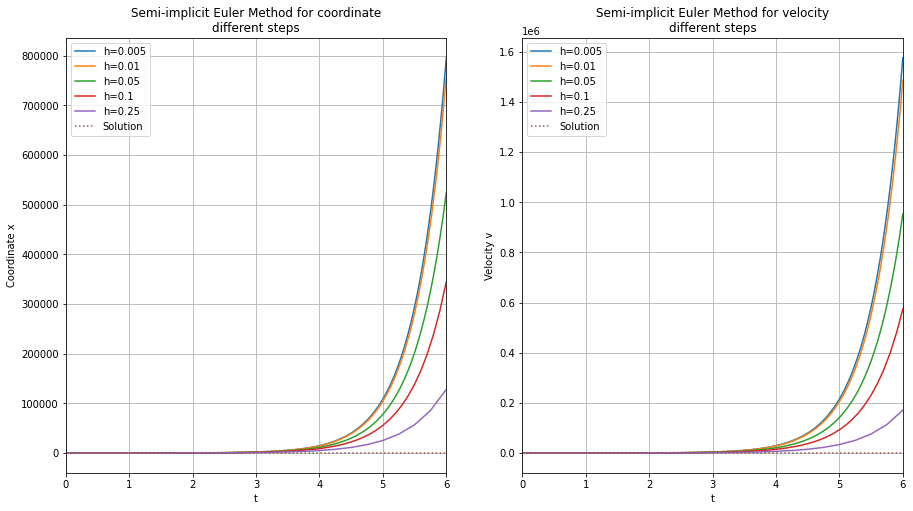

In [16]:
# Напівнеявний метод Ейлера
StabilityAnalysis(SemiImplEuler,H1,t0,tn,x0,equation3,solution3)

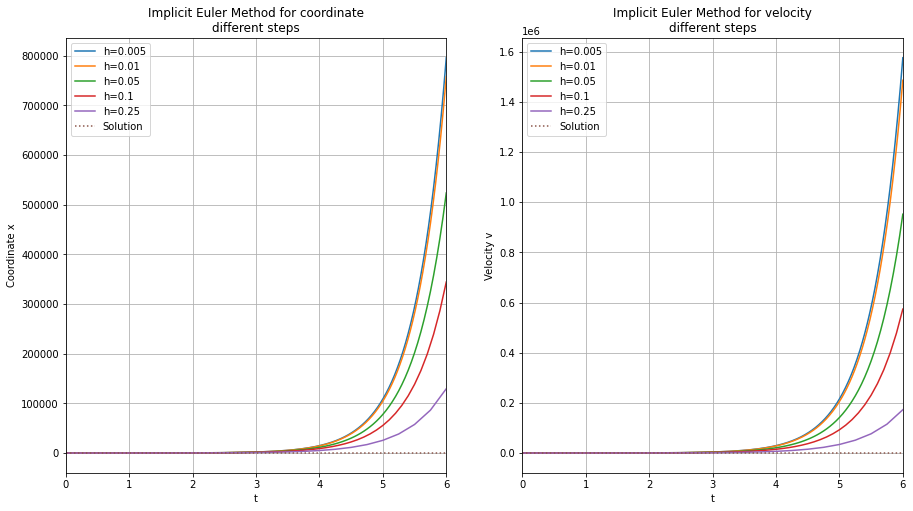

In [17]:
# Неявний метод Ейлера
StabilityAnalysis(ImplEuler,H1,t0,tn,x0,equation3,solution3)

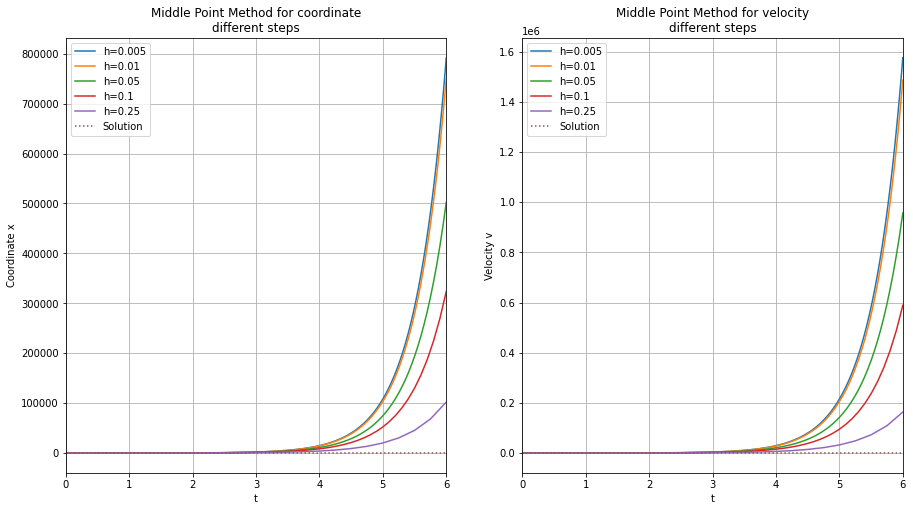

In [18]:
# Метод серединної точки
StabilityAnalysis(MiddlePoint,H1,t0,tn,x0,equation3,solution3)

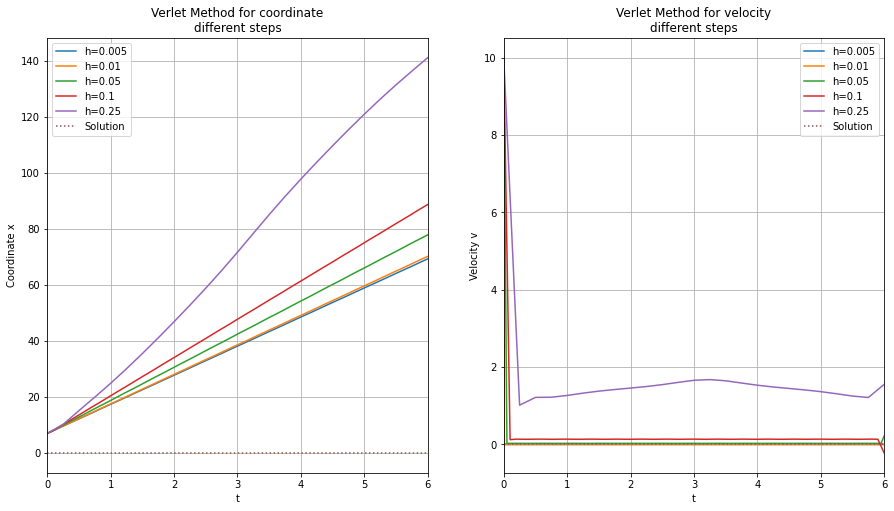

In [19]:
# Метод Верле
StabilityAnalysis(Verlet,H1,t0,tn,x0,equation3,solution3)

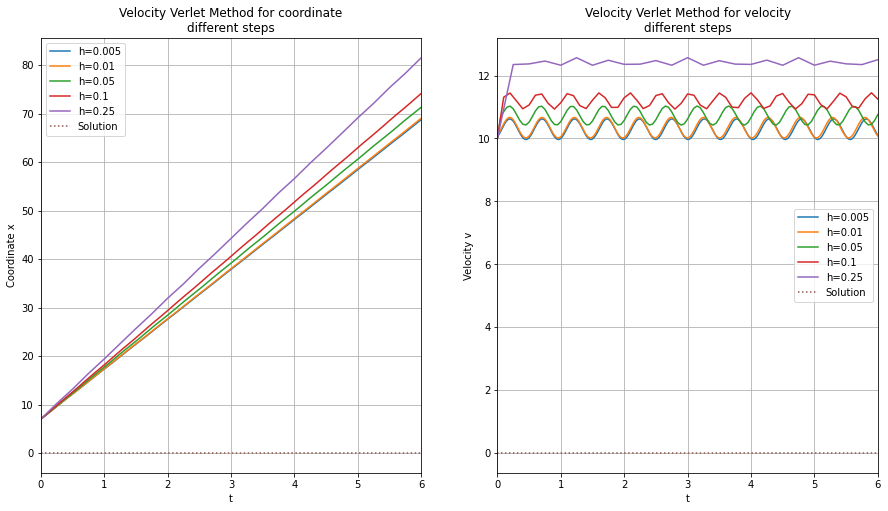

In [20]:
# Швидкісний метод Верле
StabilityAnalysis(VeloVerlet,H1,t0,tn,x0,equation3,solution3)

Для задачі 3 отримано, що всі методи мають майже однакову стійкість. Методи Верле та швидкісного Верле тут не працюють, адже у рівнянні немає залежності прискорення від швидкості.

# Оцінка точності

## Задача 1

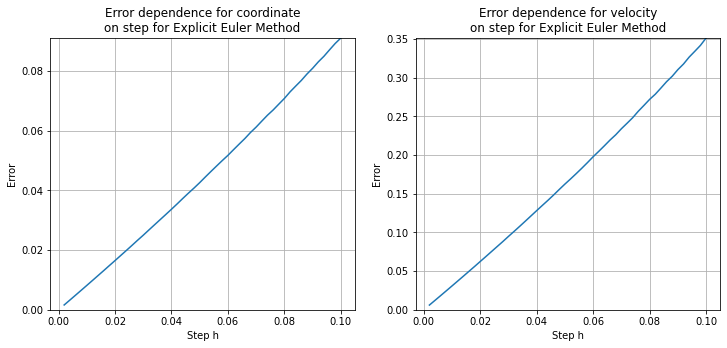

In [21]:
Error(ExplEuler,H2,t0,tn,x0,equation1,solution1)

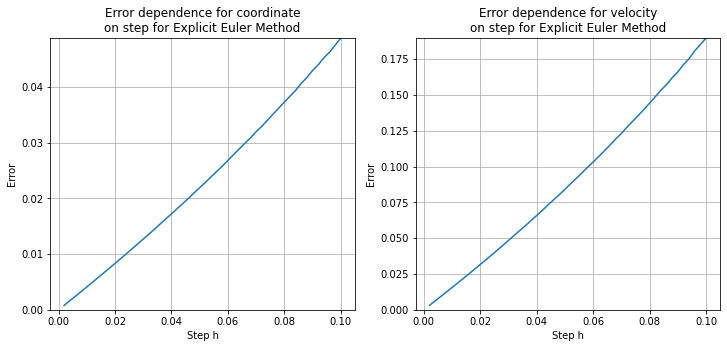

In [22]:
Errorh2(ExplEuler,H2,t0,tn,x0,equation1,solution1)

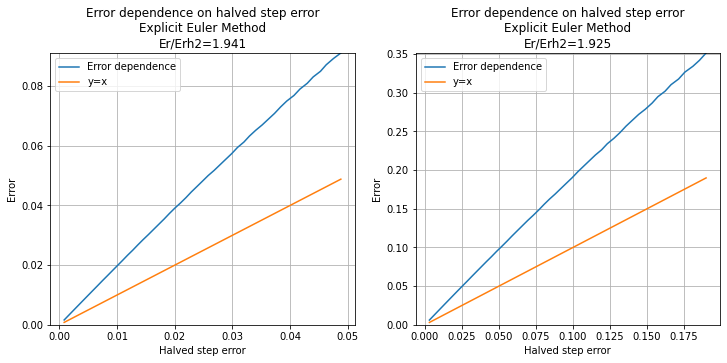

In [23]:
Errors(ExplEuler,H2,t0,tn,x0,equation1,solution1)

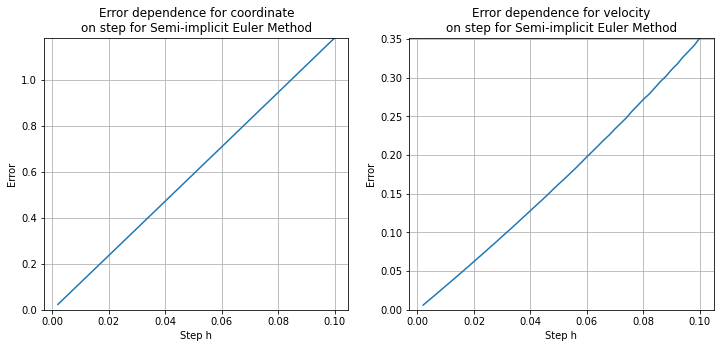

In [24]:
Error(SemiImplEuler,H2,t0,tn,x0,equation1,solution1)

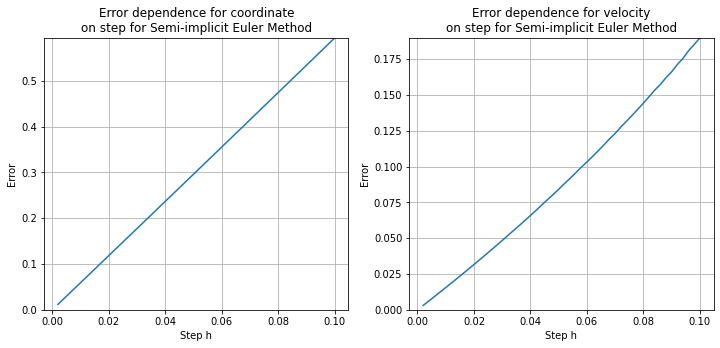

In [25]:
Errorh2(SemiImplEuler,H2,t0,tn,x0,equation1,solution1)

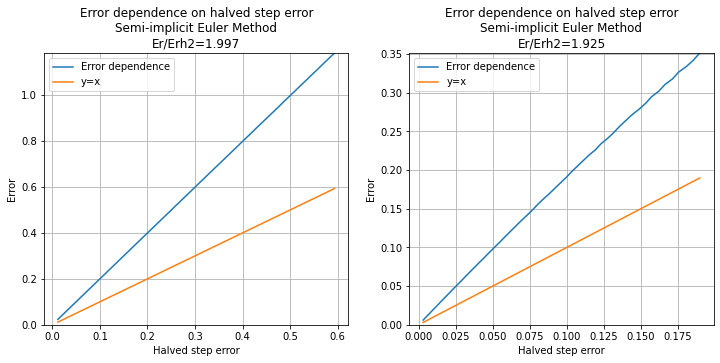

In [26]:
Errors(SemiImplEuler,H2,t0,tn,x0,equation1,solution1)

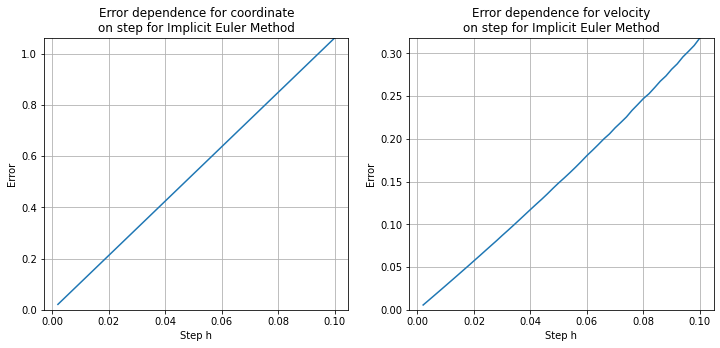

In [27]:
Error(ImplEuler,H2,t0,tn,x0,equation1,solution1)

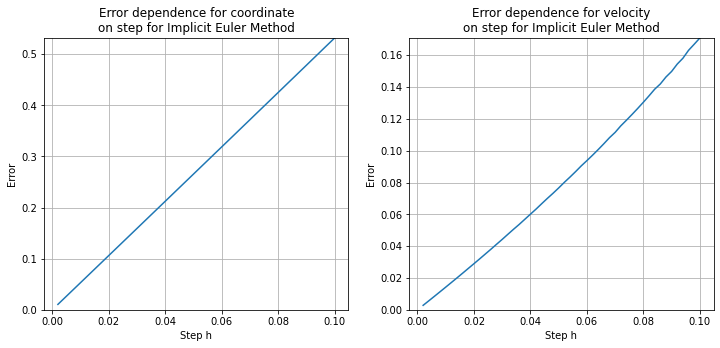

In [28]:
Errorh2(ImplEuler,H2,t0,tn,x0,equation1,solution1)

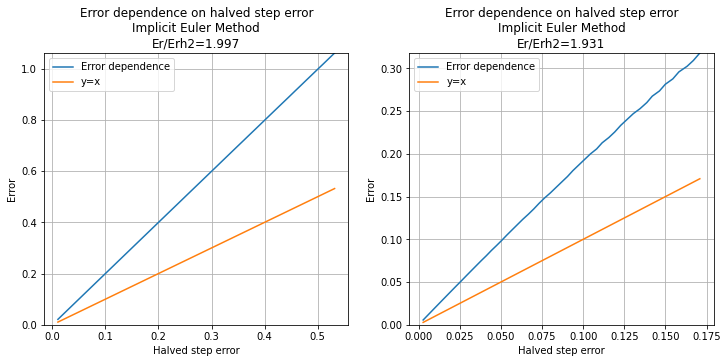

In [29]:
Errors(ImplEuler,H2,t0,tn,x0,equation1,solution1)

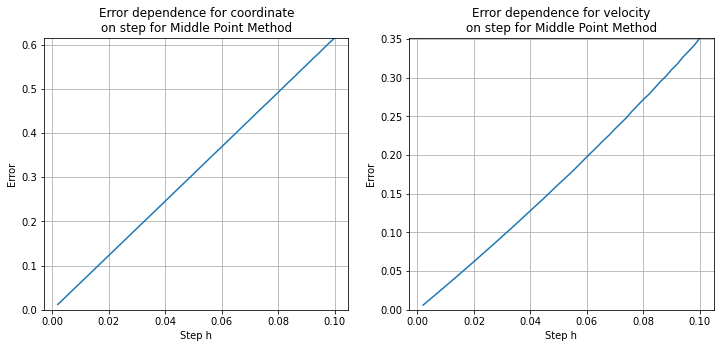

In [30]:
Error(MiddlePoint,H2,t0,tn,x0,equation1,solution1)

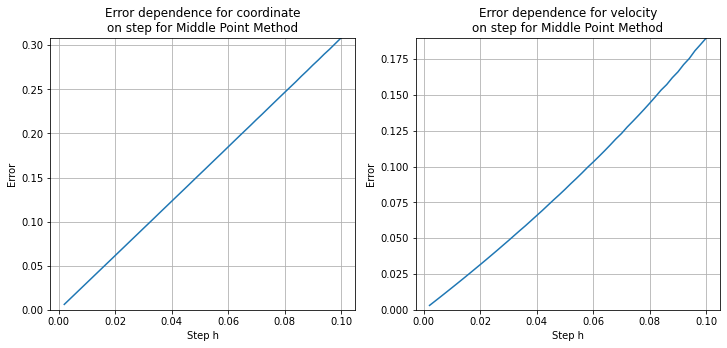

In [31]:
Errorh2(MiddlePoint,H2,t0,tn,x0,equation1,solution1)

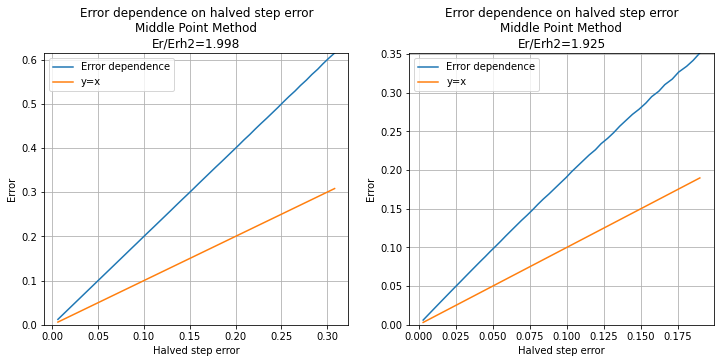

In [32]:
Errors(MiddlePoint,H2,t0,tn,x0,equation1,solution1)

За графіками помилок ми знову бачимо, що для задачі 1 найбільш точним виявився явний метод Ейлера (похибка на кінці інтревалу становуть 0.08 та 0.04), гірші результати дає метод серединної точки, ще гірші - напівнеявний та неявний методи Ейлера. Бачимо, що похибки обчислені різними способами відрізняються майже вдвічі.

## Задача 2

Для задач 2 та 3 некоректно використовувати методи Error, Errors, адже вони використовують аналітичні розв'язки задач, яких у нас немає, тому для аналізу будемо використовувати лише метод половинноъ похибки.

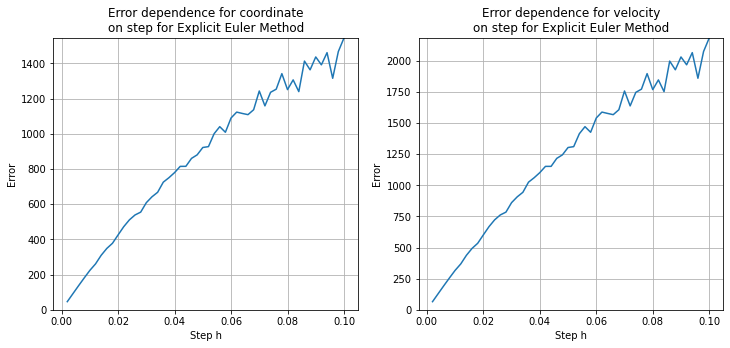

In [33]:
Errorh2(ExplEuler,H2,t0,tn,x0,equation2,solution2)

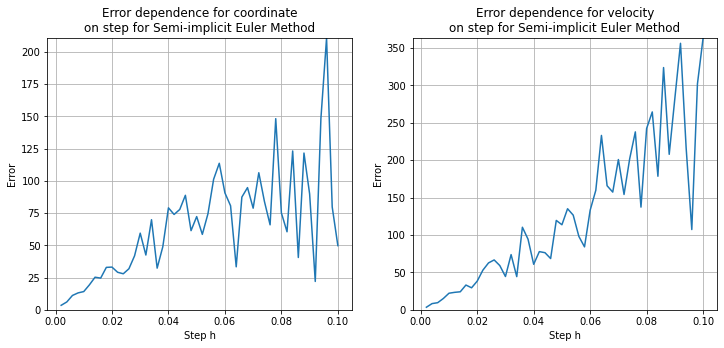

In [34]:
Errorh2(SemiImplEuler,H2,t0,tn,x0,equation2,solution2)

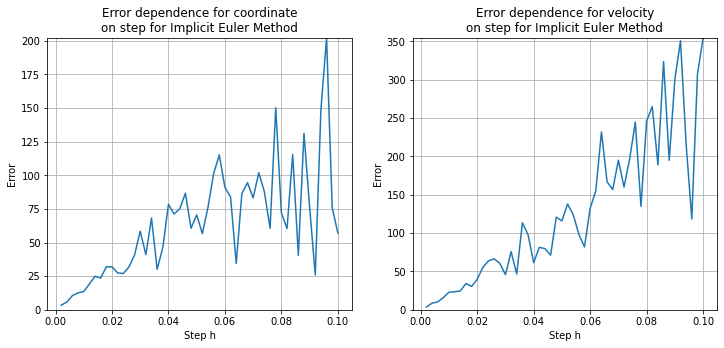

In [35]:
Errorh2(ImplEuler,H2,t0,tn,x0,equation2,solution2)

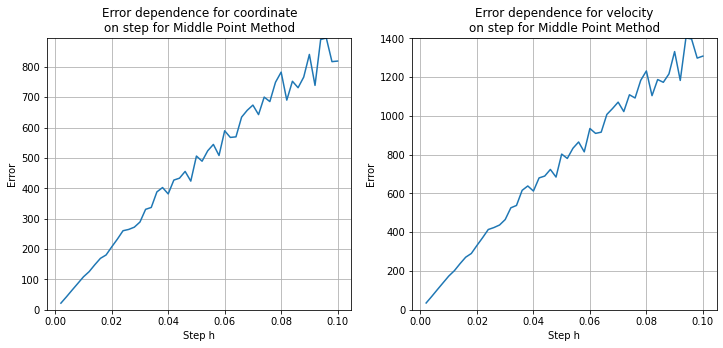

In [36]:
Errorh2(MiddlePoint,H2,t0,tn,x0,equation2,solution2)

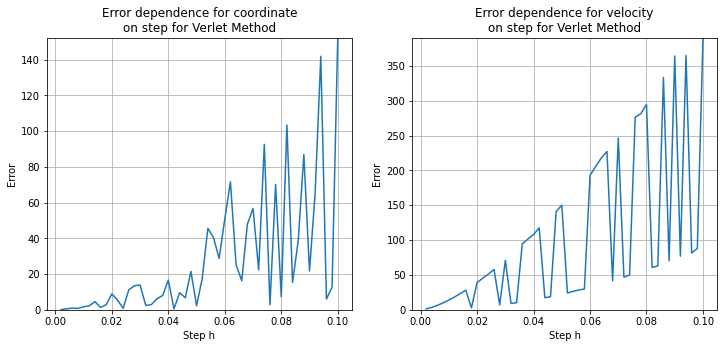

In [37]:
Errorh2(Verlet,H2,t0,tn,x0,equation2,solution2)

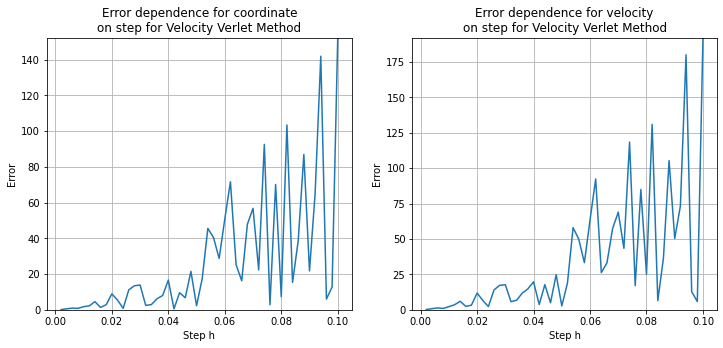

In [38]:
Errorh2(VeloVerlet,H2,t0,tn,x0,equation2,solution2)

За графіками помилок ми бачимо, що явний метод Ейлера дає велику похибку, метод серединної точки дещо кращий, тоді як найкращі результати отримані для методів Верле та швидкісного Верле. Також помітимо, що по мірі збільшення кроку похибки починають осцилювати.

## Задача 3

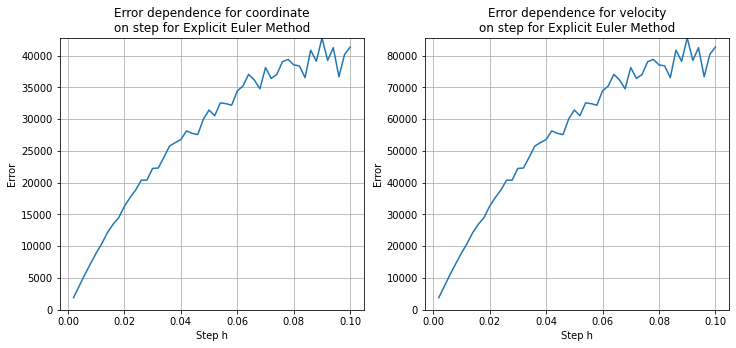

In [39]:
Errorh2(ExplEuler,H2,t0,tn,x0,equation3,solution3)

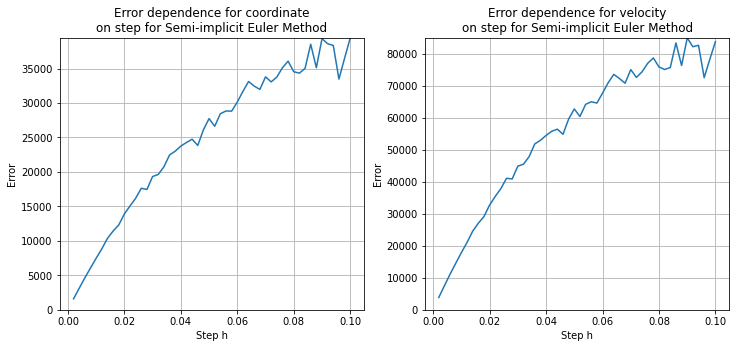

In [40]:
Errorh2(SemiImplEuler,H2,t0,tn,x0,equation3,solution3)

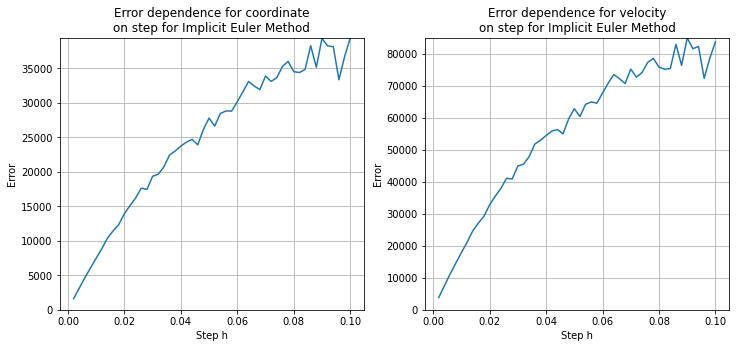

In [41]:
Errorh2(ImplEuler,H2,t0,tn,x0,equation3,solution3)

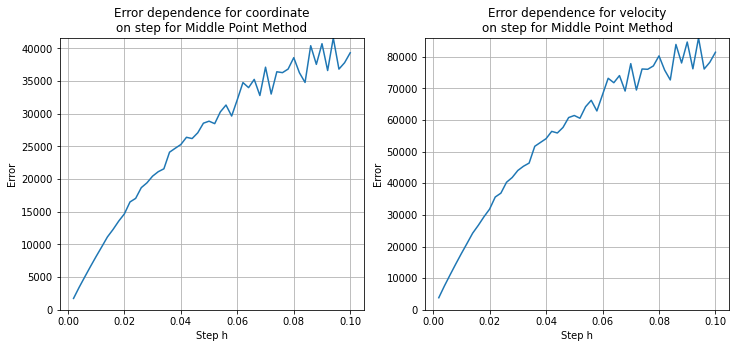

In [42]:
Errorh2(MiddlePoint,H2,t0,tn,x0,equation3,solution3)

Останнє рівняння є чутливим до кроку, адже розв'язок є експоненційним. Бачимо, що для всіх методів отримано велику похибку. Тому можемо спробувати менші кроки.

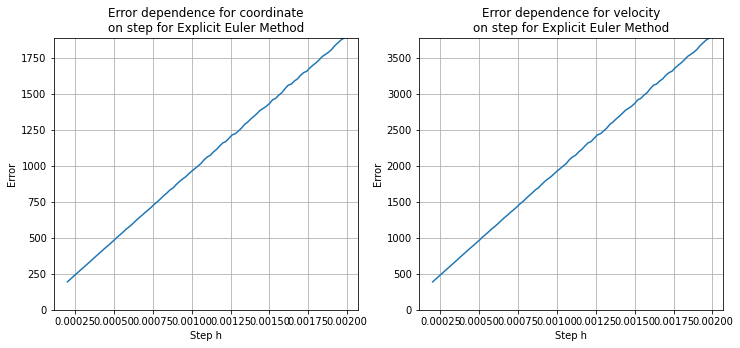

In [43]:
Errorh2(ExplEuler,H2_2,t0,tn,x0,equation3,solution3)

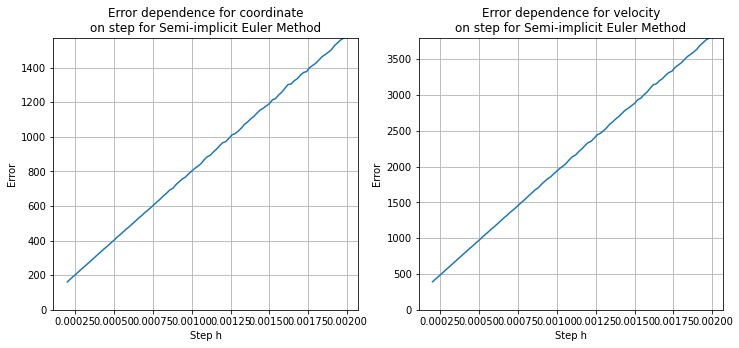

In [44]:
Errorh2(SemiImplEuler,H2_2,t0,tn,x0,equation3,solution3)

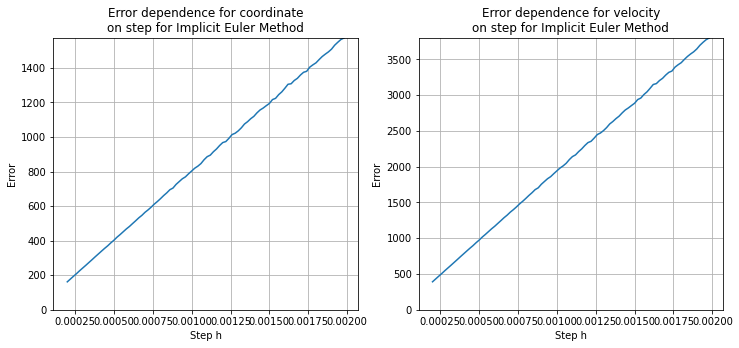

In [45]:
Errorh2(ImplEuler,H2_2,t0,tn,x0,equation3,solution3)

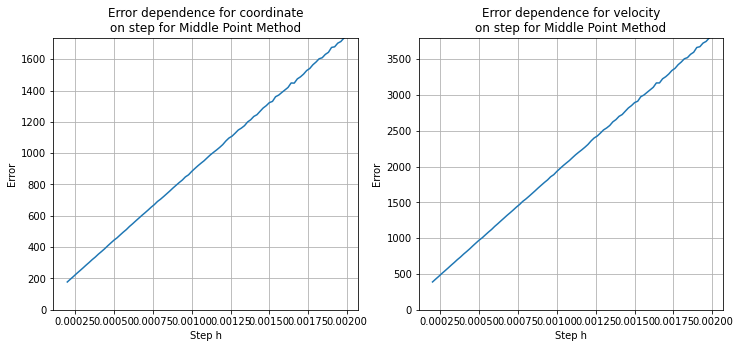

In [46]:
Errorh2(MiddlePoint,H2_2,t0,tn,x0,equation3,solution3)

Бачимо, що похибки все ще значні,але принаймні їх можна порівнювати між собою. За отриманими графіками бачимо, що методи напівнеявного та неявного Ейлера дають дещо кращі результати. 

# Покращення точності
Для кожної із задач спробуємо покращити точність на методі, який працював найточніше, а також шляхом зменшення кроку.
- Для задачі 1 - це був метод Ейлера, з похибкою 0.5 при крокі 0.1.
- Для задачі 2 - методи Верле та швидкісного Верле.
- Для задачі 3 - неявний та напівнеявний Ейлер.

## Задача 1

In [47]:
#Дуже маленькі кроки для похибки
H2_3=np.arange(0.000002, 0.000005, 0.000001)

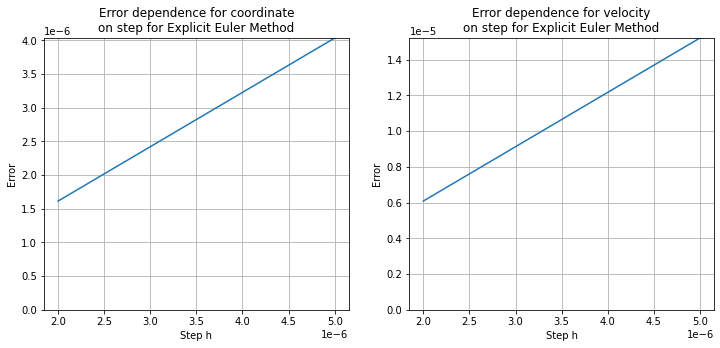

In [48]:
Error(ExplEuler,H2_3,t0,tn,x0,equation1,solution1)

Бачимо, що при кроці $2\cdot10^{-6}$ похибка становить приблизно $1.7\cdot10^{-6}$.

## Задача 2

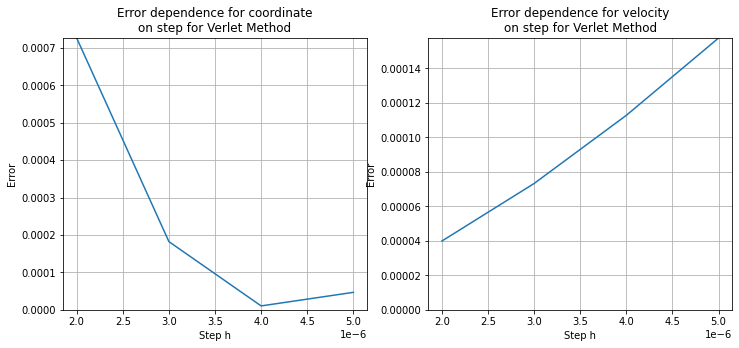

In [49]:
Errorh2(Verlet,H2_3,t0,tn,x0,equation2,solution2)

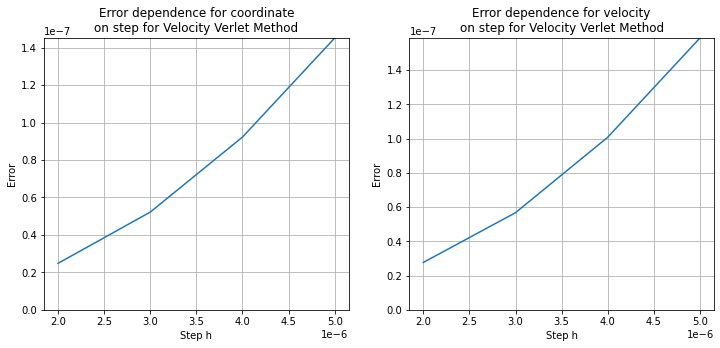

In [50]:
Errorh2(VeloVerlet,H2_3,t0,tn,x0,equation2,solution2)

Бачимо, що при кроці $2\cdot10^{-6}$ похибка становить приблизно $1.7\cdot10^{-4}$ в методі Верле та $1.4\cdot10^{-7}$ в методі швидкісного Верле.

## Задача 3

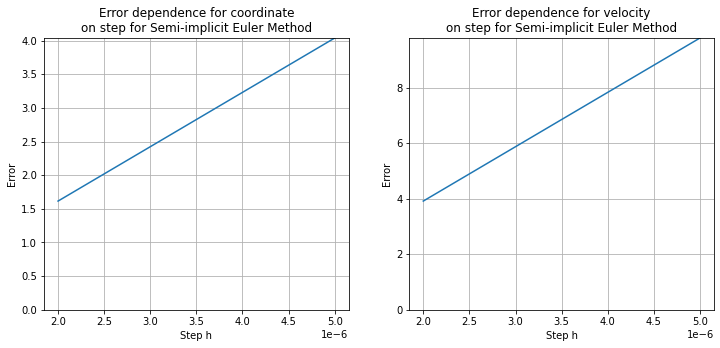

In [51]:
Errorh2(SemiImplEuler,H2_3,t0,tn,x0,equation3,solution3)

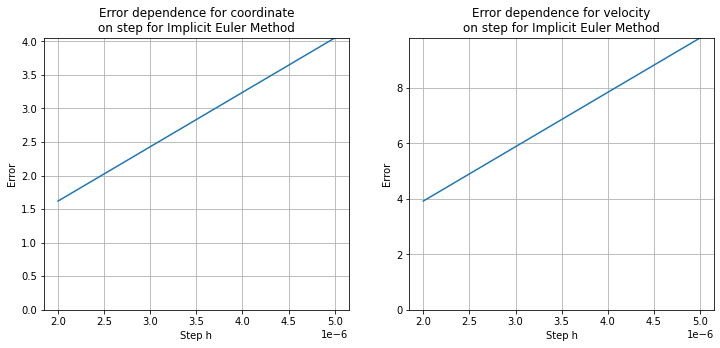

In [52]:
Errorh2(ImplEuler,H2_3,t0,tn,x0,equation3,solution3)

Бачимо, що при кроці $2\cdot10^{-6}$ похибка становить приблизно 1.6 в обох методах, що не дуже гарний результат, але він значно кращий, ніж був при більших кроках.

# Кілька графіків на одній площині

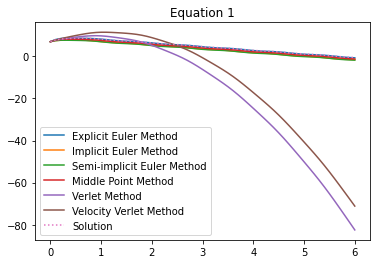

In [60]:
Methods = [ExplEuler, ImplEuler, SemiImplEuler, MiddlePoint, Verlet, VeloVerlet]
h = 0.1
MethodAnalysis(Methods,"Equation 1",h,t0,tn,x0,equation1,solution1)

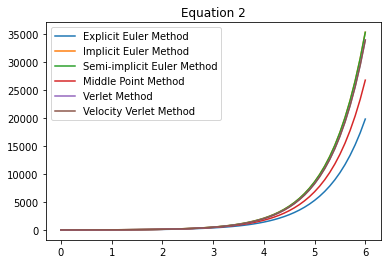

In [61]:
MethodAnalysis(Methods,"Equation 2",h,t0,tn,x0,equation2)

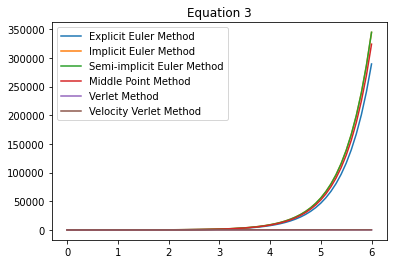

In [62]:
MethodAnalysis(Methods,"Equation 3",h,t0,tn,x0,equation3)